# ECE657A - Assignment 2 

**Date Submitted :** 11th March 2022


## Introduction

This notebook explores a data set about Abalones and Wine-quality. Specifically, the data set describes several physical characteristics of abalones, and then gives a number of rings found in the shell as well as wine dataset consist of various features including all the minerals and its aciditiy.

In this notebook, we'll explore the abalone shell data as well as wine data, examine distributions, and perform classification using various classifire algorithms like KNN, Naive Bayes, Decision Tree , Random forest, and Gradient tree boosting.

Start by importing libraries:

In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn_evaluation import plot

In [2]:
from scipy.stats import skew
from scipy import stats

In [211]:
from sklearn.decomposition import PCA
import matplotlib.colors as mcolors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [4]:
# Define columns for the provided dataset.
ab_S = ['Sex']
ab_D = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
ab_R = ['Rings']
ab_SD = ab_S + ab_D



# Loading the Abalone data
abalone_df = pd.read_csv('abalone.csv', header=None, sep=',', names=ab_SD+ab_R)

w_D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
w_L = 'quality'
w_C = 'color'
w_Dw_L = w_D + [w_L]
w_Dw_C = w_D + [w_C]
w_Dw_Lw_C = w_Dw_L + [w_C]

#Loading Red Wine Dataset
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading white Wine Dataset
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[w_C]= np.zeros(wine_w.shape[0])
wine_r[w_C]= np.ones(wine_r.shape[0])

wine = pd.concat([wine_w,wine_r], ignore_index = True)


In [5]:
#Display The head --> To Check if Data is Properly Imported


print("                           Table1:  Abalone                               ")
print(abalone_df.head())
print("                                  Table 2:   Wine                              ")
print(wine.head())

                           Table1:  Abalone                               
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  
                                  Table 2:   Wine                              
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34     

In [6]:
print ("                                     Abalone                            ")
print(abalone_df.info())
print("shape of the data: ", abalone_df.shape)
print()
print("                                      Wine                               ")
print(wine.info())
print("shape of the data: ", wine.shape)

                                     Abalone                            
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
shape of the data:  (4177, 9)

                                      Wine                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dt

### According to the information:
#### For Abalone : There is no No-Null data ,1 Object Type ,7 Float Type and 1 Int Type data are present and it has total 4177 rows and 9 columns present.
#### For Wine : There is no No-Null data ,12 Float Type and 1 Int Type data are present and it has total 6497 rows and 13 columns present.

## First we will preprocess abalone data and run KNN on that

we have already done this step in Assignment 1 with different normalizations and will only use the best formulation of both data set for rest steps.

In [7]:
abalone_nf = abalone_df.select_dtypes(include=[np.number]).columns
abalone_nfr = abalone_nf.drop(["Rings"]) #dropping Rings

In [8]:
abalone_X = abalone_df[abalone_nfr]
abalone_Y = abalone_df["Rings"]

print("                     Table:3                      ")
print(abalone_X.head()) 
print("")
print(abalone_Y.head())

                     Table:3                      
   Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64


In [9]:
arr = abalone_Y.unique()
print("Unique Values : ", arr)
print("Count :",len(arr))

Unique Values :  [15  7  9 10  8 20 16 19 14 11 12 18 13  5  4  6 21 17 22  1  3 26 23 29
  2 27 25 24]
Count : 28


* Here we have 28 unique values in the target colums which means we will have to classify our data into 28 classes and this will be a **multi-class classifier** problem.

### Applied Z-score normalization on abalone dataset , tried to train KNN the model and get the test set accuracy.

In [12]:
abalone_X_znorm = abalone_X.apply(stats.zscore)
print(abalone_X_znorm.shape)
print(abalone_Y.shape)

(4177, 7)
(4177,)


In [13]:
abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test = train_test_split(abalone_X_znorm,abalone_Y,test_size=0.2,random_state=27)

### Train and test the KNN model for different values of K

**We will train the model on range(1,70) of K and get the best accuracy associated with K will get printed**

**Training on Z-score normalized abalone data**

In [14]:
k = range(1,70,1) 
K = []
testing_accuracy = []
#training_accuracy = []
score = 0

for i in k:
    K.append(i)
    knn = KNeighborsClassifier(n_neighbors = i)
    #pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    knn.fit(abalone_X_train, abalone_y_train)
    
    abalone_y_pred = knn.predict(abalone_X_test)
    acc_score = accuracy_score(abalone_y_test,abalone_y_pred)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
       
print('Best Accuracy Score', score, 'Best K-Score', best_k)

Best Accuracy Score 0.291866028708134 Best K-Score 61


##### The Best accuracy of abalone using KNN is 29.1% at K-value 61

## Applied min-max normalization on wine dataset , tried to train the model and get the test set accuracy.

In [15]:
wine_X = wine.drop(['quality','color'], axis = 1)
wine_Y = wine.quality
print("                                         Table 4 :  Wine Data after dropping quality and color                                         ")
wine_X.head()

                                         Table 4 :  Wine Data after dropping quality and color                                         


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [16]:
wine_X.shape

(6497, 11)

In [17]:
wine_X_minmax = (wine_X-wine_X.min())/(wine_X.max()-wine_X.min())

print("                                        Table 5 MinMax Normalization                   ")
wine_X_minmax.head()

                                        Table 5 MinMax Normalization                   


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.264463,0.126667,0.216867,0.308282,0.059801,0.152778,0.377880,0.267785,0.217054,0.129213,0.115942
1,0.206612,0.146667,0.204819,0.015337,0.066445,0.045139,0.290323,0.132832,0.449612,0.151685,0.217391
2,0.355372,0.133333,0.240964,0.096626,0.068106,0.100694,0.209677,0.154039,0.418605,0.123596,0.304348
3,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362
4,0.280992,0.100000,0.192771,0.121166,0.081395,0.159722,0.414747,0.163678,0.364341,0.101124,0.275362


In [18]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_minmax,wine_Y,test_size=0.2,random_state=27)

In [19]:
k = range(1,70,1)
K_w = []
testing_accuracy_weighted_man = []
#training_accuracy = []
score = 0

for i in k:
    K_w.append(i)
    knn = KNeighborsClassifier(n_neighbors = i, weights = "distance",metric = "manhattan") 
    #pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
    knn.fit(wine_X_train, wine_y_train)
    
    wine_y_pred = knn.predict(wine_X_test)
    acc_score = accuracy_score(wine_y_test,wine_y_pred)
    testing_accuracy_weighted_man.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i
       
print('Best Accuracy Score', score, 'Best K-Score', best_k ,'for manhattan')

Best Accuracy Score 0.6938461538461539 Best K-Score 26 for manhattan


##### For abalone - best accuracy = 29.18% at K-Score 61 (Z-score Normalization)
##### For Wine - best accuracy = 69.38% at K-Score 26 for (manhattan minmax normalization)

# Answer 1 : Representation Learning


## Answer 1.1 : PCA / LDA / t-SNE

### we will apply PCA and LDA on both the dataset and get the optimum component values. we will also plot 2d t-SNE  for both wine and abalone dataset


### PCA on wine data


In [20]:
pca_2compo = PCA(n_components= 2)  # we will reduce the data set from 11 columns to 2 columns.

wine_X_train_pca = pca_2compo.fit_transform(wine_X_train) # fit means train, fit_transform means train and apply to a data set.
wine_X_test_pca = pca_2compo.transform(wine_X_test)  # Only transformation

In [21]:
len(wine_X_train_pca)
print(wine_X_train_pca.shape)
print()
print(wine_X_train_pca)
print(wine_y_train.unique())

(5197, 2)

[[ 0.09928956 -0.23939122]
 [-0.26651147  0.13087374]
 [ 0.02295013 -0.43210659]
 ...
 [ 0.2806341   0.14104826]
 [-0.0763282   0.1325697 ]
 [ 0.13362078 -0.24602541]]
[6 4 7 5 8 3 9]


In [22]:
p2c = pca_2compo.explained_variance_ratio_
print(p2c)

[0.32279011 0.2374186 ]


Text(0.5, 1.0, 'Figure : 1  PCA of Wine dataset')

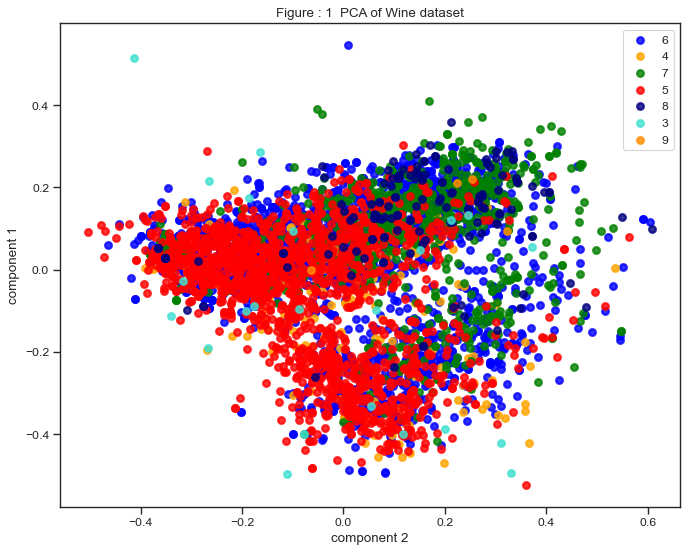

In [23]:
plt.figure(figsize=(10, 8), dpi=80)
colors = ["blue","orange","green","red","navy", "turquoise", "darkorange"]
lw = 2
target_names = [6, 4, 7, 5, 8, 3, 9]
for color, i, tn in zip(colors, [6, 4, 7, 5, 8, 3, 9], target_names):
    plt.scatter(
        wine_X_train_pca[wine_y_train == i, 0], wine_X_train_pca[wine_y_train == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("Figure : 1  PCA of Wine dataset")

PCA on Wine dataset shows that some classes like class 5 & 8 might be higly correlated with each other and it might be difficult to differentiate them from each other but,we can differentiate class 5 and 7 from each other as class 5 is mostly at the negative side while, class 7 is on the positive side.

### LDA on wine data

In [27]:
lda_2compo = LDA(n_components = 2)
wine_X_train_lda = lda_2compo.fit_transform(wine_X_train,wine_y_train) # fit means train, fit_transform means train and apply to a data set.
wine_X_test_lda = lda_2compo.transform(wine_X_test)  # Only transformation

In [28]:
len(wine_X_train_lda)
print(wine_X_train_lda.shape)

print(wine_y_train.unique())

(5197, 2)
[6 4 7 5 8 3 9]


Text(0.5, 1.0, 'Figure:2  LDA of Wine dataset')

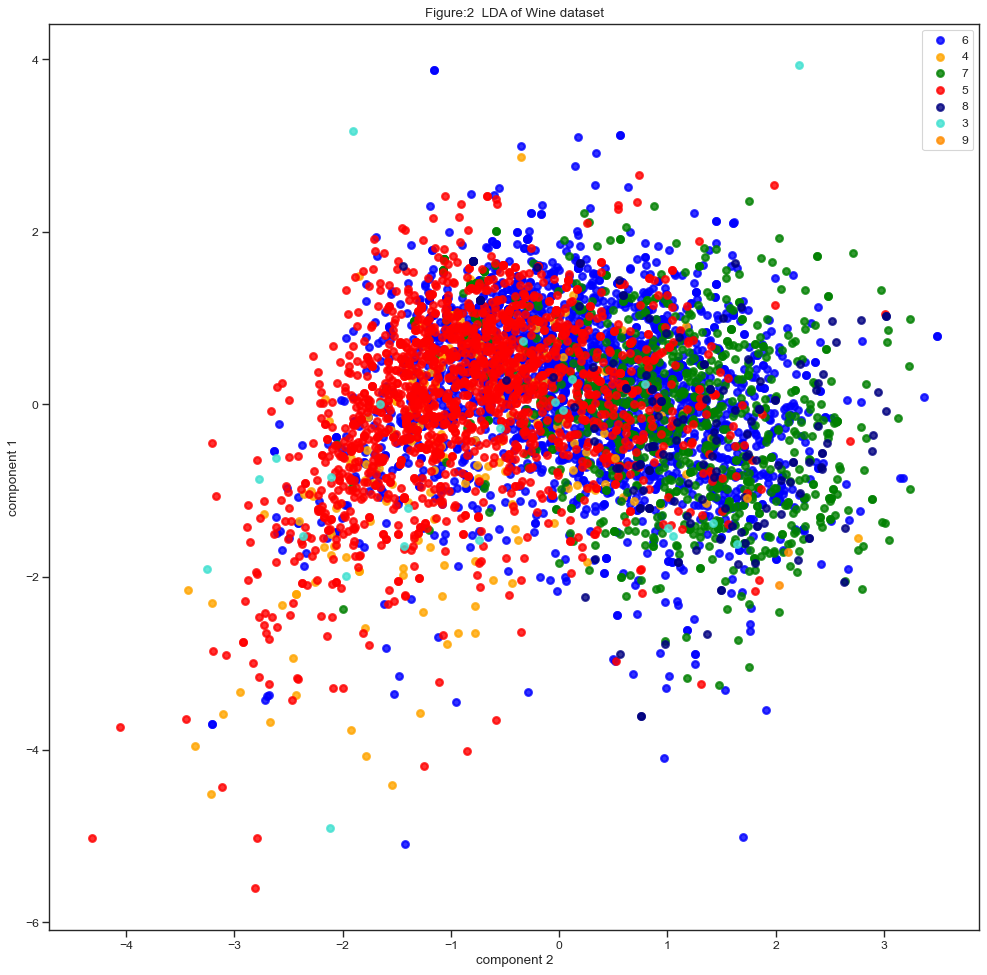

In [140]:
plt.figure(figsize=(15, 15), dpi=80)
colors = ["blue","orange","green","red","navy", "turquoise", "darkorange"]
lw = 2
target_names = [6, 4, 7, 5, 8, 3, 9]
for color, i, tn in zip(colors, [6, 4, 7, 5, 8, 3, 9], target_names):
    plt.scatter(
        wine_X_train_lda[wine_y_train == i, 0], wine_X_train_lda[wine_y_train == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("Figure:2  LDA of Wine dataset")

LDA on Wine data shows, class 4 seems to be easily differentiated from rest at it acquires mostly negative side , but here some cluster might be overlapping with each other.

### t_SNE of wine dataset

In [30]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
wine_X_train_tsne = tsne.fit_transform(wine_X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5197 samples in 0.002s...
[t-SNE] Computed neighbors for 5197 samples in 0.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5197
[t-SNE] Computed conditional probabilities for sample 2000 / 5197
[t-SNE] Computed conditional probabilities for sample 3000 / 5197
[t-SNE] Computed conditional probabilities for sample 4000 / 5197
[t-SNE] Computed conditional probabilities for sample 5000 / 5197
[t-SNE] Computed conditional probabilities for sample 5197 / 5197
[t-SNE] Mean sigma: 0.075713
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.082146
[t-SNE] KL divergence after 300 iterations: 2.088587


In [31]:
print(wine_X_train_tsne.shape)

print(wine_y_train.unique())

(5197, 2)
[6 4 7 5 8 3 9]


Text(0.5, 1.0, 'Figure : 3  t-SNE 2D of Wine dataset')

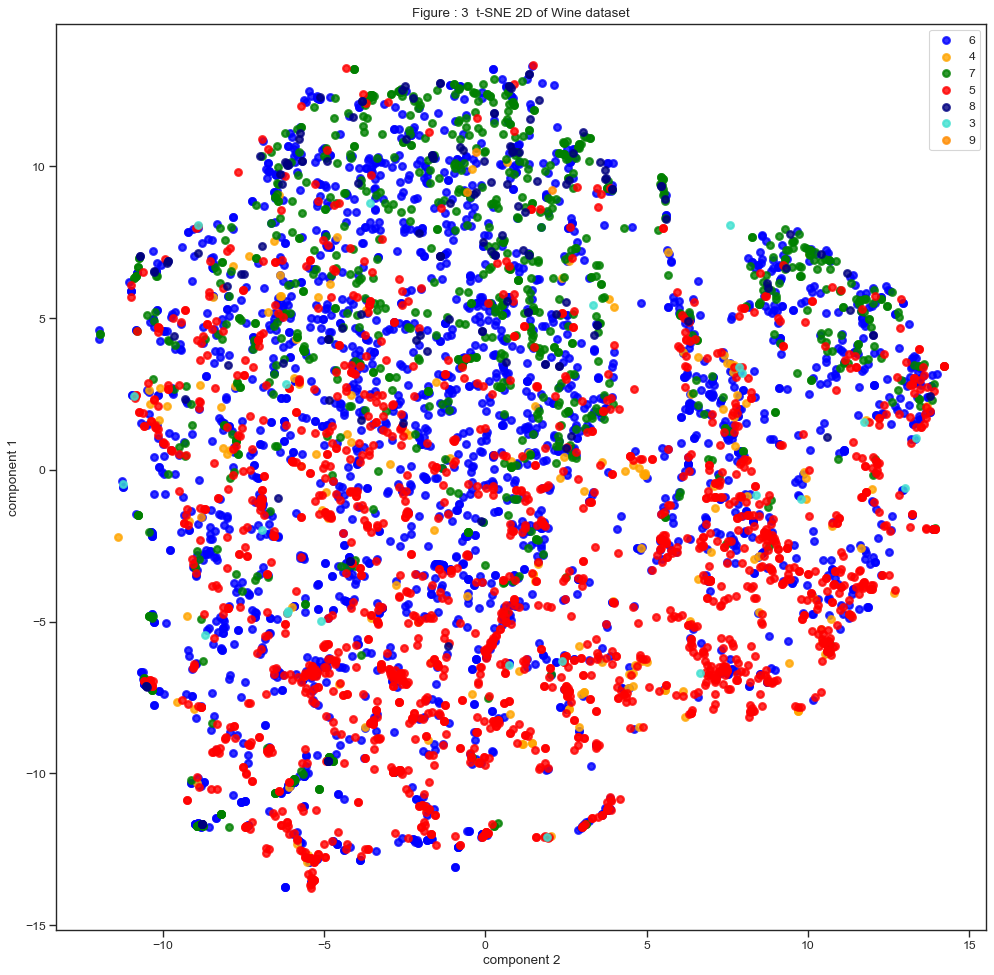

In [141]:
plt.figure(figsize=(15, 15), dpi=80)
colors = ["blue","orange","green","red","navy", "turquoise", "darkorange"]
lw = 2
target_names = [6, 4, 7, 5, 8, 3, 9]
for color, i, tn in zip(colors, [6, 4, 7, 5, 8, 3, 9], target_names):
    plt.scatter(
        wine_X_train_tsne[wine_y_train == i, 0], wine_X_train_tsne[wine_y_train == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("Figure : 3  t-SNE 2D of Wine dataset")

### PCA on abalone data

In [33]:
pca_2compo = PCA(n_components= 2)  # we will reduce the data set from 11 columns to 2 columns.

abalone_X_train_pca = pca_2compo.fit_transform(abalone_X_train) # fit means train, fit_transform means train and apply to a data set.
abalone_X_test_pca = pca_2compo.transform(abalone_X_test)  # Only transformation

In [34]:
print(abalone_X_train_pca.shape)
print(abalone_y_train.unique())

(3341, 2)
[14  8  6  9 10  7 11  5 12 23 20 13 15 17 19  4 16 22 18 21 27  3 26  1
  2 24 29 25]


Text(0.5, 1.0, 'Figure :4 PCA of Abalone dataset')

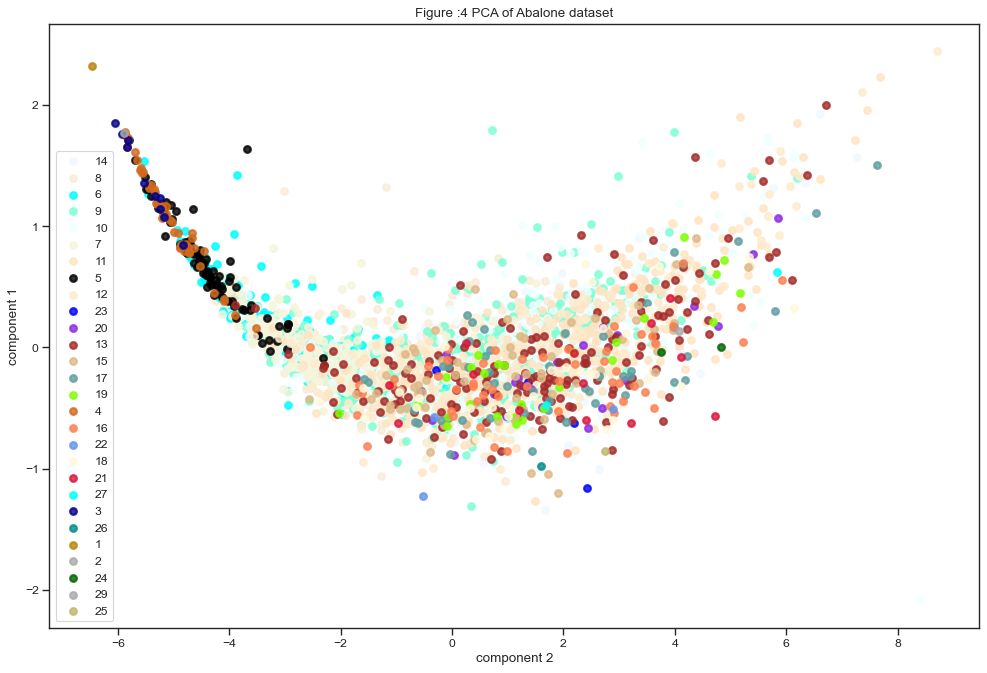

In [142]:
plt.figure(figsize=(15, 10), dpi=80)
#colors_lda = ["blue","orange","green","red","navy", "turquoise", "darkorange"]
lw = 2
target_names = [14, 8, 6, 9, 10, 7, 11, 5, 12, 23, 20, 13, 15, 17, 19, 4, 16, 22, 18, 21, 27, 3, 26, 1, 2, 24, 29, 25]
for color, i, tn in zip(mcolors.CSS4_COLORS, [14, 8, 6, 9, 10, 7, 11, 5, 12, 23, 20, 13, 15, 17, 19, 4, 16, 22, 18, 21, 27, 3, 26, 1, 2, 24, 29, 25], target_names):
    plt.scatter(
        abalone_X_train_pca[abalone_y_train == i, 0], abalone_X_train_pca[abalone_y_train == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("Figure :4 PCA of Abalone dataset")

PCA on abalone dataset figure shows, that all clusters might be highly correlated which each other. Some classes like 5 can be seperated easily. we can not comment properly on this as there are many classes ploted in 2D graph.

### LDA on abalone dataset

In [36]:
lda_2compo = LDA(n_components = 2)
abalone_X_train_lda = lda_2compo.fit_transform(abalone_X_train,abalone_y_train) # fit means train, fit_transform means train and apply to a data set.
abalone_X_test_lda = lda_2compo.transform(abalone_X_test)  # Only transformation

In [37]:
print(abalone_X_train_lda.shape)

print(abalone_y_train.unique())

(3341, 2)
[14  8  6  9 10  7 11  5 12 23 20 13 15 17 19  4 16 22 18 21 27  3 26  1
  2 24 29 25]


Text(0.5, 1.0, 'Figure:5  LDA of Abalone dataset')

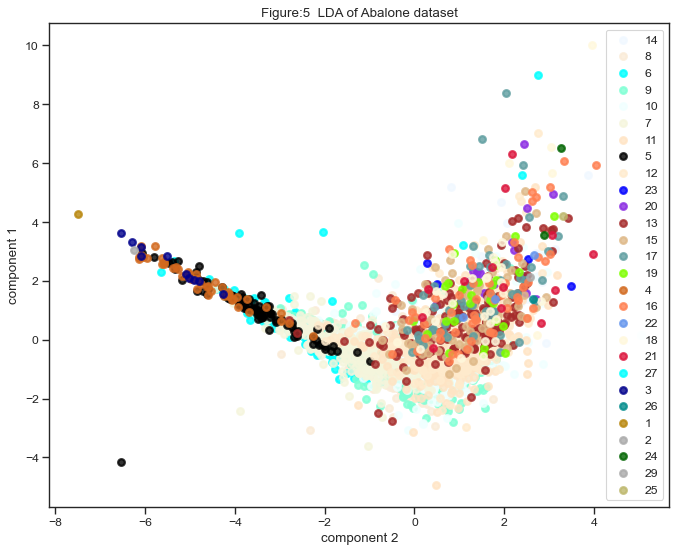

In [143]:
plt.figure(figsize=(10, 8), dpi=80)
#colors_lda = ["blue","orange","green","red","navy", "turquoise", "darkorange"]
lw = 2
target_names = [14, 8, 6, 9, 10, 7, 11, 5, 12, 23, 20, 13, 15, 17, 19, 4, 16, 22, 18, 21, 27, 3, 26, 1, 2, 24, 29, 25]
for color, i, tn in zip(mcolors.CSS4_COLORS, [14, 8, 6, 9, 10, 7, 11, 5, 12, 23, 20, 13, 15, 17, 19, 4, 16, 22, 18, 21, 27, 3, 26, 1, 2, 24, 29, 25], target_names):
    plt.scatter(
        abalone_X_train_lda[abalone_y_train == i, 0], abalone_X_train_lda[abalone_y_train == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("Figure:5  LDA of Abalone dataset")

In abalone dataset, there are many classes so seprating clusters would be a difficult part as seen in the graph. 

### t-SNE on abalone dataset

In [39]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
abalone_X_train_tsne = tsne.fit_transform(abalone_X_train)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3341 samples in 0.001s...
[t-SNE] Computed neighbors for 3341 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3341
[t-SNE] Computed conditional probabilities for sample 2000 / 3341
[t-SNE] Computed conditional probabilities for sample 3000 / 3341
[t-SNE] Computed conditional probabilities for sample 3341 / 3341
[t-SNE] Mean sigma: 0.210982
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.793091
[t-SNE] KL divergence after 300 iterations: 1.467492


In [40]:
print(abalone_X_train_tsne.shape)
print(abalone_y_train.unique())

(3341, 2)
[14  8  6  9 10  7 11  5 12 23 20 13 15 17 19  4 16 22 18 21 27  3 26  1
  2 24 29 25]


Text(0.5, 1.0, 'PCA of Abalone dataset')

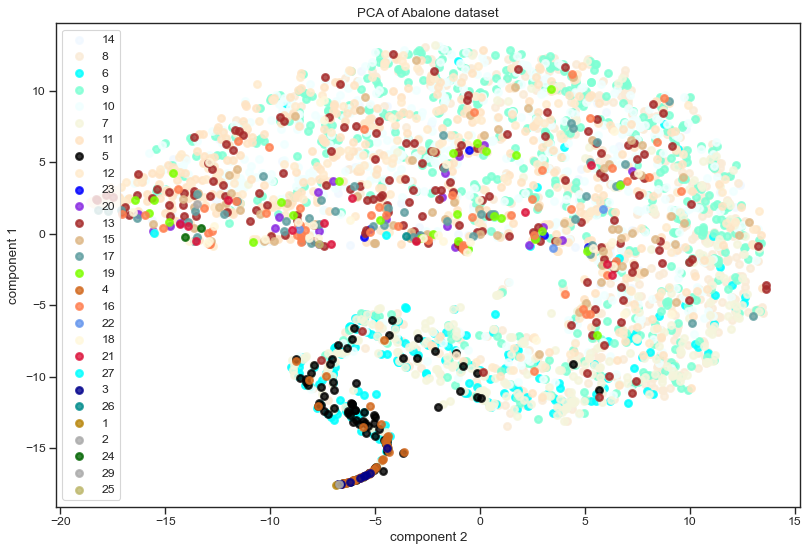

In [144]:
plt.figure(figsize=(12, 8), dpi=80)
#colors_lda = ["blue","orange","green","red","navy", "turquoise", "darkorange"]
lw = 2
target_names = [14, 8, 6, 9, 10, 7, 11, 5, 12, 23, 20, 13, 15, 17, 19, 4, 16, 22, 18, 21, 27, 3, 26, 1, 2, 24, 29, 25]
for color, i, tn in zip(mcolors.CSS4_COLORS, [14, 8, 6, 9, 10, 7, 11, 5, 12, 23, 20, 13, 15, 17, 19, 4, 16, 22, 18, 21, 27, 3, 26, 1, 2, 24, 29, 25], target_names):
    plt.scatter(
        abalone_X_train_tsne[abalone_y_train == i, 0], abalone_X_train_tsne[abalone_y_train == i, 1], color=color, alpha=0.8, lw=lw,label = tn
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("component 2")
plt.ylabel("component 1")
plt.title("PCA of Abalone dataset")

## 1.2 screeplot for PCA

### Screeplot for wine

In [42]:
pca_allCompo = PCA(n_components= None)  
wine_X_train_pca_all = pca_allCompo.fit_transform(wine_X_train) # fit means train, fit_transform means train and apply to a data set.
wine_X_test_pca_all = pca_allCompo.transform(wine_X_test)  # Only transformation


In [43]:
wine_pca_explained_variance = pca_allCompo.explained_variance_ratio_
print(len(wine_pca_explained_variance))
print(sorted(wine_pca_explained_variance,reverse = True))

11
[0.32279010640645095, 0.23741859596954012, 0.16166690869956588, 0.07929551980771846, 0.06581522454653121, 0.04044147579723611, 0.032313341796797394, 0.030143750677154666, 0.015970821258320975, 0.012970101642848283, 0.001174153397835923]


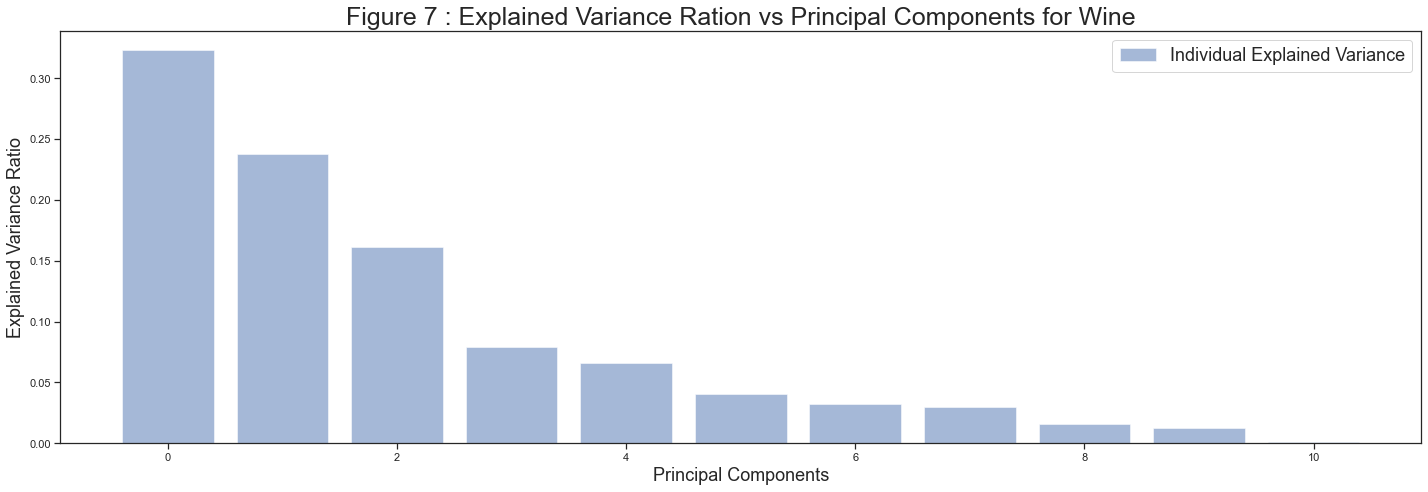

In [44]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(11), wine_pca_explained_variance, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 18)
plt.xlabel('Principal Components',fontsize = 18)
plt.title('Figure 7 : Explained Variance Ration vs Principal Components for Wine',fontsize = 25)
plt.legend(loc='best',fontsize = 18)
#plt.axis("off")
plt.tight_layout()
plt.show()

The graph is exponentially decreasing , so we can conclude that till 6 principal component, there will be more variance and after that the variance would be less.

### Screeplot for abalone

In [45]:
abalone_X_train_pca_all = pca_allCompo.fit_transform(abalone_X_train) # fit means train, fit_transform means train and apply to a data set.
abalone_X_test_pca_all = pca_allCompo.transform(abalone_X_test)  # Only transformation

In [46]:
abalone_pca_explained_variance = pca_allCompo.explained_variance_ratio_
print(len(abalone_pca_explained_variance))
print(sorted(abalone_pca_explained_variance,reverse = True))

7
[0.9224123898031906, 0.030401256031741, 0.0200283020461862, 0.014491670791604244, 0.009747144198881175, 0.0019065342774142655, 0.0010127028509822448]


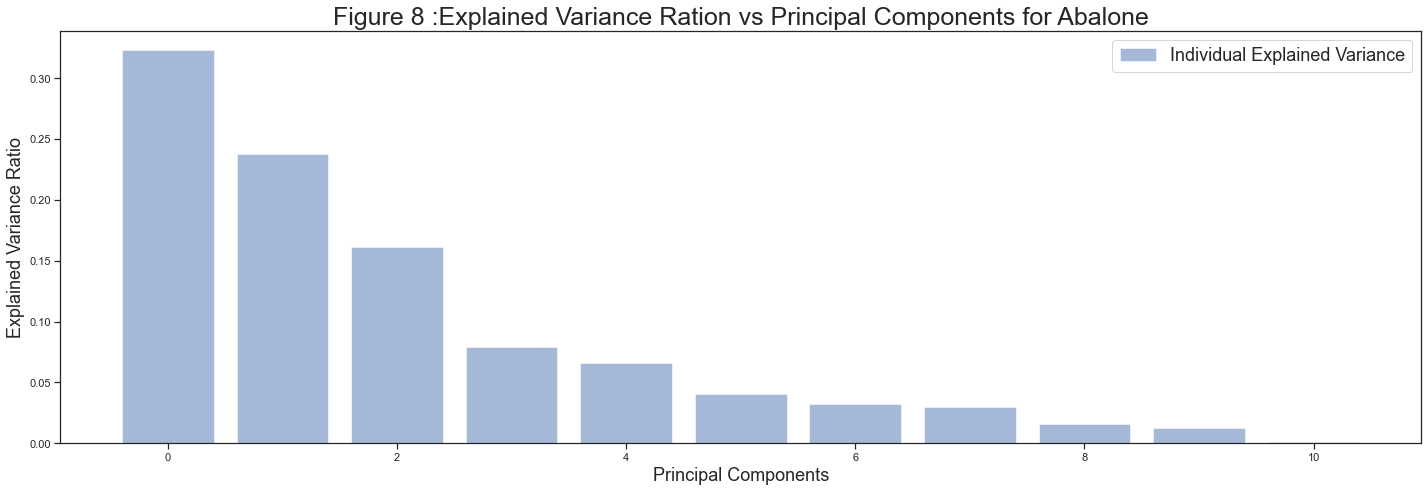

In [47]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(11), wine_pca_explained_variance, alpha=0.5, align='center',label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',fontsize = 18)
plt.xlabel('Principal Components',fontsize = 18)
plt.title('Figure 8 :Explained Variance Ration vs Principal Components for Abalone',fontsize = 25)
plt.legend(loc='best',fontsize = 18)
#plt.axis("off")
plt.tight_layout()
plt.show()

As we can see the graph is exponentially decreasing , so principal components till 6 will make more variance and after that the variance would be less.

### 1.3 Accuracy of kNN classifier Vs number of reduced dimensions(PCA)

In [48]:
def KNNonwine(train_x,train_y,test_x,test_y):
    k = range(1,70,1)
    K_w = []
    testing_accuracy_weighted_man = []
    #training_accuracy = []
    score = 0

    for i in k:
        K_w.append(i)
        knn = KNeighborsClassifier(n_neighbors = i, weights = "distance",metric = "manhattan") 
        #pipe_knn = Pipeline([('scale', MinMaxScaler()), ('knn', knn)])
        knn.fit(train_x,train_y)

        y_pred = knn.predict(test_x)
        acc_score = accuracy_score(test_y,y_pred)
        testing_accuracy_weighted_man.append(acc_score)

        if score < acc_score:
            score = acc_score
            best_k = i

    print('Best Accuracy Score', score, 'Best K-Score', best_k ,'for manhattan')
    
    return score

In [49]:
wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_minmax,wine_Y,test_size=0.2,random_state=27)

### wine-pca

In [50]:
number_compo = []
accuracies = []
for i in range(2,12):
   # print(i)
    pca = PCA(n_components= i) 
    #print(pca)
    
    wine_X_train_pca = pca.fit_transform(wine_X_train) 
    wine_X_test_pca = pca.transform(wine_X_test)  
    
    
    acc = KNNonwine(wine_X_train_pca, wine_y_train , wine_X_test_pca , wine_y_test)
    
    number_compo.append(i)
    accuracies.append(acc)

print(number_compo)
print(accuracies)
    

Best Accuracy Score 0.6430769230769231 Best K-Score 67 for manhattan
Best Accuracy Score 0.67 Best K-Score 45 for manhattan
Best Accuracy Score 0.6853846153846154 Best K-Score 53 for manhattan
Best Accuracy Score 0.69 Best K-Score 34 for manhattan
Best Accuracy Score 0.6961538461538461 Best K-Score 41 for manhattan
Best Accuracy Score 0.693076923076923 Best K-Score 36 for manhattan
Best Accuracy Score 0.6953846153846154 Best K-Score 59 for manhattan
Best Accuracy Score 0.6915384615384615 Best K-Score 65 for manhattan
Best Accuracy Score 0.6923076923076923 Best K-Score 38 for manhattan
Best Accuracy Score 0.69 Best K-Score 50 for manhattan
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.6430769230769231, 0.67, 0.6853846153846154, 0.69, 0.6961538461538461, 0.693076923076923, 0.6953846153846154, 0.6915384615384615, 0.6923076923076923, 0.69]


Text(0, 0.5, 'KNN accuracy')

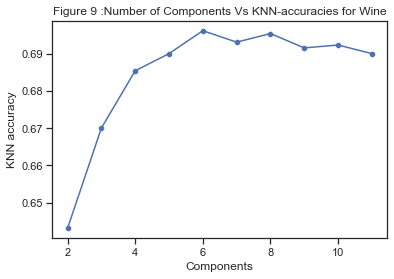

In [51]:
sns.lineplot(number_compo, accuracies)
sns.scatterplot(number_compo, accuracies)

plt.title("Figure 9 :Number of Components Vs KNN-accuracies for Wine")
plt.xlabel("Components")
plt.ylabel("KNN accuracy")

we will get the best accuracy when compenents is 6. The accuracy found here is bit high than the accuracy found in KNN (Assignment1). so, by reducing the dimensionality to 6 PCA perform bit well than KNN.

####  abalone pca

In [52]:
abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test = train_test_split(abalone_X_znorm,abalone_Y,test_size=0.2,random_state=27)

In [53]:
number_compo_ab_pca = []
accuracies_ab_pca = []
for i in range(2,8):
   # print(i)
    pca = PCA(n_components= i) 
    #print(pca)
    
    abalone_X_train_pca = pca.fit_transform(abalone_X_train) 
    abalone_X_test_pca = pca.transform(abalone_X_test)  
    
    
    acc = KNNonwine(abalone_X_train_pca, abalone_y_train , abalone_X_test_pca , abalone_y_test)
    
    number_compo_ab_pca.append(i)
    accuracies_ab_pca.append(acc)

print(number_compo_ab_pca)
print(accuracies_ab_pca)
    

Best Accuracy Score 0.25717703349282295 Best K-Score 61 for manhattan
Best Accuracy Score 0.2715311004784689 Best K-Score 68 for manhattan
Best Accuracy Score 0.26674641148325356 Best K-Score 25 for manhattan
Best Accuracy Score 0.2811004784688995 Best K-Score 56 for manhattan
Best Accuracy Score 0.2811004784688995 Best K-Score 40 for manhattan
Best Accuracy Score 0.28708133971291866 Best K-Score 40 for manhattan
[2, 3, 4, 5, 6, 7]
[0.25717703349282295, 0.2715311004784689, 0.26674641148325356, 0.2811004784688995, 0.2811004784688995, 0.28708133971291866]


Text(0, 0.5, 'KNN accuracy')

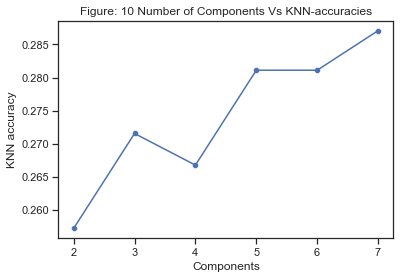

In [54]:
sns.lineplot(number_compo_ab_pca, accuracies_ab_pca)
sns.scatterplot(number_compo_ab_pca, accuracies_ab_pca)

plt.title("Figure: 10 Number of Components Vs KNN-accuracies")
plt.xlabel("Components")
plt.ylabel("KNN accuracy")

The best accuracy found is approx 28.3 when there are 6 components. In abalone, accuracy doest get better after using PCA may be because our dataset is highly unbalanced.

##  1.4 : Accuracy of kNN classifier Vs number of reduced dimensions(LDA)

####  Wine LDA

In [55]:
number_compo_lda = []
accuracies_lda = []
for i in range(2,7):
   # print(i)
    lda = LDA(n_components= i) 
    #print(pca)
    
    wine_X_train_lda = lda.fit_transform(wine_X_train,wine_y_train) 
    wine_X_test_lda = lda.transform(wine_X_test)  
    
    
    acc = KNNonwine(wine_X_train_lda, wine_y_train , wine_X_test_lda , wine_y_test)
    
    number_compo_lda.append(i)
    accuracies_lda.append(acc)

print(number_compo_lda)
print(accuracies_lda)

Best Accuracy Score 0.6638461538461539 Best K-Score 69 for manhattan
Best Accuracy Score 0.6707692307692308 Best K-Score 68 for manhattan
Best Accuracy Score 0.6715384615384615 Best K-Score 54 for manhattan
Best Accuracy Score 0.6692307692307692 Best K-Score 41 for manhattan
Best Accuracy Score 0.6753846153846154 Best K-Score 67 for manhattan
[2, 3, 4, 5, 6]
[0.6638461538461539, 0.6707692307692308, 0.6715384615384615, 0.6692307692307692, 0.6753846153846154]


Text(0, 0.5, 'KNN accuracy')

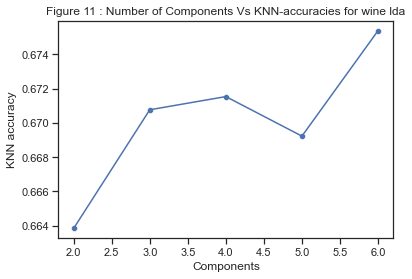

In [56]:
sns.lineplot(number_compo_lda, accuracies_lda)
sns.scatterplot(number_compo_lda, accuracies_lda)

plt.title("Figure 11 : Number of Components Vs KNN-accuracies for wine lda")
plt.xlabel("Components")
plt.ylabel("KNN accuracy")

The best accuracy found is approx 67.2 when there are 6 components.

#### abalone lda

In [58]:
number_compo_ab_lda = []
accuracies_ab_lda = []
for i in range(2,7):
   # print(i)
    lda_ab = LDA(n_components= i) 
    #print(pca)
    
    ab_X_train_lda = lda_ab.fit_transform(abalone_X_train,abalone_y_train) 
    ab_X_test_lda = lda_ab.transform(abalone_X_test)  
    
    
    acc = KNNonwine(ab_X_train_lda, abalone_y_train ,ab_X_test_lda , abalone_y_test)
    
    number_compo_ab_lda.append(i)
    accuracies_ab_lda.append(acc)

print(number_compo_ab_lda)
print(accuracies_ab_lda)

Best Accuracy Score 0.2631578947368421 Best K-Score 67 for manhattan
Best Accuracy Score 0.2607655502392344 Best K-Score 55 for manhattan
Best Accuracy Score 0.2822966507177033 Best K-Score 67 for manhattan
Best Accuracy Score 0.29066985645933013 Best K-Score 65 for manhattan
Best Accuracy Score 0.2834928229665072 Best K-Score 44 for manhattan
[2, 3, 4, 5, 6]
[0.2631578947368421, 0.2607655502392344, 0.2822966507177033, 0.29066985645933013, 0.2834928229665072]


Text(0, 0.5, 'KNN accuracy')

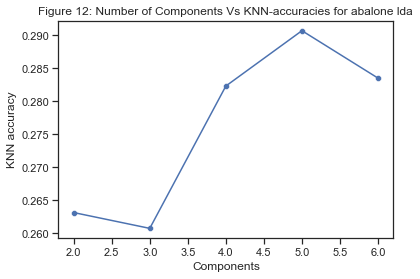

In [59]:
sns.lineplot(number_compo_ab_lda, accuracies_ab_lda)
sns.scatterplot(number_compo_ab_lda, accuracies_ab_lda)

plt.title("Figure 12: Number of Components Vs KNN-accuracies for abalone lda")
plt.xlabel("Components")
plt.ylabel("KNN accuracy")

The best accuracy found is approx 29.0 when there are 5 components. In abalone, accuracy doest get better after using PCA/LDA may be because our dataset is highly unbalanced.

#### Selecting the best representation for each dataset (ALL 6 DATASET) 

In [60]:
scaler = MinMaxScaler()

In [61]:
##Abalone Raw (Z-norm) dataset

abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test = train_test_split(abalone_X_znorm,abalone_Y,test_size=0.2,random_state=27)
abalone_xtrain_mm = scaler.fit_transform(abalone_X_train)


In [62]:
#wine raw (minmax) norm dataset

wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_minmax,wine_Y,test_size=0.2,random_state=27)


In [63]:
# wine PCA for 6 components

pca_wine_6c = PCA(n_components= 6)
#wine_X_train_pca_6c = pd.DataFrame(pca.fit_transform(wine_X_train))
wine_X_train_pca_6c = pca_wine_6c.fit_transform(wine_X_train) 
wine_X_test_pca_6c = pca_wine_6c.transform(wine_X_test)


wine_xtrain_pca6c_mm= scaler.fit_transform(wine_X_train_pca_6c)
wine_xtest_pca6c_mm= scaler.fit_transform(wine_X_test_pca_6c)


In [64]:
# wine LDA for  4 components

lda_wine_4c = LDA(n_components= 4) 

wine_X_train_lda_4c = lda_wine_4c.fit_transform(wine_X_train,wine_y_train) 
wine_X_test_lda_4c = lda_wine_4c.transform(wine_X_test)  

wine_xtrain_lda4c_mm = scaler.fit_transform(wine_X_train_lda_4c)
wine_xtest_lda4c_mm = scaler.fit_transform(wine_X_test_lda_4c)

In [65]:
# abalone PCA for 6 components

pca_ab_6c = PCA(n_components= 6) 

ab_X_train_pca_6c = pca_ab_6c.fit_transform(abalone_X_train) 
ab_X_test_pca_6c = pca_ab_6c.transform(abalone_X_test) 

ab_xtrain_pca6c_mm = scaler.fit_transform(ab_X_train_pca_6c)
ab_xtest_pca6c_mm = scaler.fit_transform(ab_X_test_pca_6c)

In [66]:
#abalone LDA for 5 components

lda_ab_5c = LDA(n_components= 5) 

ab_X_train_lda_5c = lda_ab_5c.fit_transform(abalone_X_train,abalone_y_train) 
ab_X_test_lda_5c = lda_ab_5c.transform(abalone_X_test)

ab_xtrain_lda5c_mm = scaler.fit_transform(ab_X_train_lda_5c)
ab_xtest_lda5c_mm = scaler.fit_transform(ab_X_test_lda_5c)

### Variables name for all the dataset

##### 1)  wine raw : wine_X_train, wine_X_test, wine_y_train, wine_y_test
##### 2)  wine pca : wine_X_train_pca_6c, wine_X_test_pca_6c
   #####                      : wine_xtrain_pca6c_mm,wine_xtest_pca6c_mm(after applying minmax scaler for Naive Bayes classifier)
##### 3) wine Lda : wine_X_train_lda_4,wine_X_test_lda_4
#####                     : wine_xtrain_lda4c_mm, wine_xtest_lda4c_mm(applying minmax scaler for Naive Bayes)
##### 4) abalone raw : abalone_X_train, abalone_X_test, abalone_y_train, abalone_y_test
##### 5) abalone pca : ab_X_train_pca_6c, ab_X_test_pca_6c
#####                           : ab_xtrain_pca6c_mm, ab_xtest_pca6c_mm(applying minmax scaler for Naive Bayes)
##### 6) abalone lda : ab_X_train_lda_5c, ab_X_test_lda_5c
#####                          : ab_xtrain_lda5c_mm, ab_xtest_lda5c_mm (applying minmax scaler for Naive Bayes)

# 2) Naive Bayes Classifier
   ## 2.1) Naive Bayes Vs KNN using 5-fold cv

Will use Multinomial Naive Bayes and Complement Naive Bayes by using 5-fold cv and then will compare the accuracies with respect to the previous knn accuracies.

In [67]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB

In [68]:
kfold = StratifiedKFold(n_splits=5)
clrs = []
clrs.append(MultinomialNB())
clrs.append(ComplementNB())

#### For Wine_raw

In [69]:
cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, wine_X_train, wine_y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["Multinomial NB", "Complement NB"]})

print('\033[1m' +               'Mean accuracy scores for wine-raw dataset  '+ '\033[0m')
print(cv_df)


Mean accuracy scores for wine-raw dataset  
   CrossVal_Score_Means  CrossValerrors            Algo
0              0.436021        0.000306  Multinomial NB
1              0.433901        0.009731   Complement NB


The accuracy score for wine_ raw Multinomial NB is 43.60 and for Complement NB is 43.39.

#### For Abalone_raw

In [70]:
cv_results_ab = []
for clr in clrs :
    
    cv_results_ab.append(cross_val_score(clr, abalone_xtrain_mm, abalone_y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results_ab:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df_ab = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["Multinomial NB", "Complement NB"]})

print('\033[1m' +               'Mean accuracy scores for abalone-raw dataset  '+ '\033[0m')
print(cv_df_ab)

Mean accuracy scores for abalone-raw dataset  
   CrossVal_Score_Means  CrossValerrors            Algo
0              0.167016        0.001238  Multinomial NB
1              0.174196        0.007110   Complement NB


The accuracy score for abalone_ raw Multinomial NB is 16.70 and for Complement NB is 17.41.

#### For Wine PCA

In [71]:
cv_results_ab = []
for clr in clrs :
    
    cv_results_ab.append(cross_val_score(clr, wine_xtrain_pca6c_mm, wine_y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results_ab:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df_ab = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["Multinomial NB", "Complement NB"]})

print('\033[1m' +               'Mean accuracy scores for wine-pca dataset  '+ '\033[0m')
print(cv_df_ab)

Mean accuracy scores for wine-pca dataset  
   CrossVal_Score_Means  CrossValerrors            Algo
0              0.436021        0.000306  Multinomial NB
1              0.413313        0.018704   Complement NB


The accuracy score for wine_pca Multinomial NB is 43.60 and for Complement NB is 41.33.

#### For Wine LDA

In [72]:
cv_results_ab = []
for clr in clrs :
    
    cv_results_ab.append(cross_val_score(clr, wine_xtrain_lda4c_mm, wine_y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results_ab:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df_ab = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["Multinomial NB", "Complement NB"]})

print('\033[1m' +               'Mean accuracy scores for wine-lda dataset  '+ '\033[0m')
print(cv_df_ab)

Mean accuracy scores for wine-lda dataset  
   CrossVal_Score_Means  CrossValerrors            Algo
0              0.436021        0.000306  Multinomial NB
1              0.429091        0.007578   Complement NB


The accuracy score for wine_lda Multinomial NB is 43.60 and for Complement NB is 42.90.

#### For Abalone PCA

In [73]:
cv_results_ab = []
for clr in clrs :
   
    cv_results_ab.append(cross_val_score(clr, ab_xtrain_pca6c_mm, abalone_y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results_ab:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df_ab = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["Multinomial NB", "Complement NB"]})

print('\033[1m' +               'Mean accuracy scores for abalone-pca dataset  '+ '\033[0m')
print(cv_df_ab)

Mean accuracy scores for abalone-pca dataset  
   CrossVal_Score_Means  CrossValerrors            Algo
0              0.166717        0.000779  Multinomial NB
1              0.204127        0.015082   Complement NB


The accuracy score for abalone_pca Multinomial NB is 16.67 and for Complement NB is 20.41.

#### For abalone LDA

In [74]:
cv_results_ab = []
for clr in clrs :
    
    cv_results_ab.append(cross_val_score(clr, ab_xtrain_lda5c_mm, abalone_y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results_ab:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df_ab = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["Multinomial NB", "Complement NB"]})

print('\033[1m' +               'Mean accuracy scores for abalone-lda dataset  '+ '\033[0m')
print(cv_df_ab)


Mean accuracy scores for abalone-lda dataset  
   CrossVal_Score_Means  CrossValerrors            Algo
0              0.166717        0.000779  Multinomial NB
1              0.247228        0.012405   Complement NB


The accuracy score for abalone_lda Multinomial NB is 16.67 and for Complement NB is 24.72.

## Answer 2.2)

### Reason why ComplementNB is performing poor :

* Usually Naive Bayes tends to perform well on multi class dataset and MultinomialNB performs well on balance multiclass data while ComplementNB should give better results on unbalance multiclass data.
* But as we can see from above results for wine dataset complementNB accuracy scores are similar to multinomialNB but they are less than than KNN, while for abalone datasert ComplementNB is performing well on each dataset than multinomialNB but still it is less than what we are getting for KNN.

* One of the reasons could be the diversity of the data with respect to its size.As we have very less amount of data for both wine and abalone, plus for abalone, data is highly unbalanced which for ComplementNB will be tough to not assign a point to a perticular class and there are high chances of getting false positives.




# Answer 3) Decision Trees Classifier

##### we will use  GrideSearchCV function to classify our datas using decision tree

## Answer 3.1 & 3.2

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [150]:
def dtree_grid_search(train_X,train_y,test_X,test_y,nfolds,title):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini'],'max_depth': np.arange(3,15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    
    #result = cross_val_score(dtree_gscv,X,y,scoring ="accuracy",cv = kfold , n_jobs = -1)
    dtree_gscv.fit(train_X, train_y)
    #scores = [x[1] for x in dtree_gscv.grid_scores_]
    score = dtree_gscv.score(test_X,test_y)
   # print(score)
    best_model =  dtree_gscv.best_params_
    plot.grid_search(dtree_gscv.cv_results_, change=('max_depth'),
                 subset={'criterion': 'gini'})
    plt.title(title)
    plt.show()
    #preds = best_model.predict(test_X)
    return  best_model , score

##### For Raw Wine

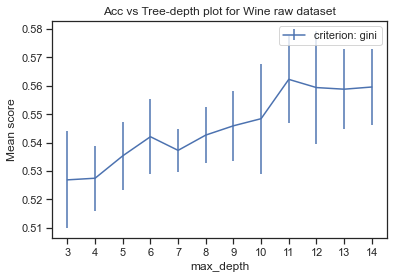

Best parameters for training dataset :  {'criterion': 'gini', 'max_depth': 11}
Best accuracy score for testing dataset :  0.55


In [151]:
wine_raw_dt, accuracy_score = dtree_grid_search(wine_X_train, wine_y_train,wine_X_test, wine_y_test , 5,"Acc vs Tree-depth plot for Wine raw dataset")

print("Best parameters for training dataset : ", wine_raw_dt)
print("Best accuracy score for testing dataset : ", accuracy_score)


For Wine_raw in decision tree classifier, best accuracy is 55.23 at max_depth : 11. 
Here the accuracy we get if for testing set but the graph plotted is for the training set.

##### For raw abalone

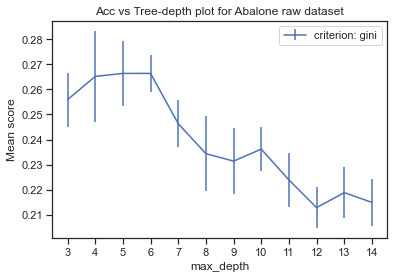

Best parameters for training dataset :  {'criterion': 'gini', 'max_depth': 6}
Best testing accuracy score :  0.2595693779904306


In [152]:
abalone_raw_dt,accuracy_score = dtree_grid_search(abalone_X_train, abalone_y_train,abalone_X_test,abalone_y_test, 5,"Acc vs Tree-depth plot for Abalone raw dataset")
print("Best parameters for training dataset : ", abalone_raw_dt)

print("Best testing accuracy score : ", accuracy_score)


For abalone_raw in decision tree classifier, best accuracy is 24.28 at max_depth : 5.
Here the accuracy we get if for testing set but the graph plotted is for the training set.

##### For Wine PCA

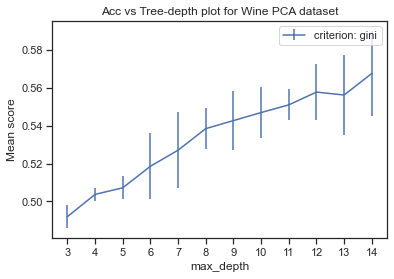

Best parameters for training dataset :  {'criterion': 'gini', 'max_depth': 14}
Best testing accuracy score :  0.3946153846153846


In [153]:
wine_pca_dt,accuracy_score = dtree_grid_search(wine_xtrain_pca6c_mm, wine_y_train, wine_xtest_pca6c_mm, wine_y_test, 5,"Acc vs Tree-depth plot for Wine PCA dataset")
print("Best parameters for training dataset : ",wine_pca_dt)
print("Best testing accuracy score : ", accuracy_score)


##### For Wine lda

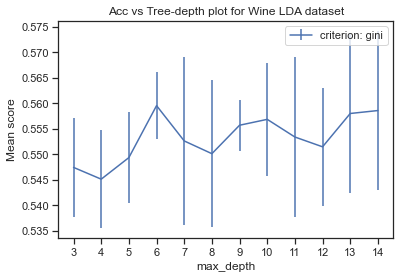

Best parameters for training dataset :  {'criterion': 'gini', 'max_depth': 6}
Best testing accuracy score :  0.5453846153846154


In [120]:
wine_lda_dt,accuracy_score = dtree_grid_search(wine_X_train_lda_4c, wine_y_train,wine_X_test_lda_4c,wine_y_test, 5,"Acc vs Tree-depth plot for Wine LDA dataset")

print("Best parameters for training dataset : ",wine_lda_dt)
print("Best testing accuracy score : ", accuracy_score)


##### For abalone PCA

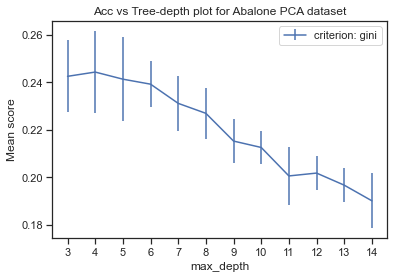

Best parameters for training dataset :  {'criterion': 'gini', 'max_depth': 6}
Best tesing accuracy score :  0.26435406698564595


In [121]:
abalone_pca_dt,accuracy_score  = dtree_grid_search(ab_X_train_pca_6c, abalone_y_train,ab_X_test_pca_6c,abalone_y_test, 5, "Acc vs Tree-depth plot for Abalone PCA dataset")
print("Best parameters for training dataset : ",wine_lda_dt)
print("Best tesing accuracy score : ", accuracy_score)

##### For Abalone LDA

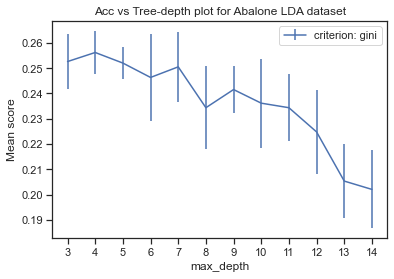

Best parameters for training dataset :  {'criterion': 'gini', 'max_depth': 4}
Best testing accuracy score :  0.2631578947368421


In [122]:
abalone_lda_dt,accuracy_score = dtree_grid_search(ab_X_train_lda_5c,abalone_y_train,ab_X_test_lda_5c,abalone_y_test, 5,"Acc vs Tree-depth plot for Abalone LDA dataset")
print("Best parameters for training dataset : ",abalone_lda_dt)
print("Best testing accuracy score : ", accuracy_score)


* All of the above graphs are training accuracies of the dataset(mean score vs tree depth for trainign dataset) and best accuracy scores we have got on testing dataset. 

# Answer 3.3
### Interpretability :

**Splitting Rules of Decision Tree Classifier for both Wine and Abalone datasets.**

### I ) Original Wine Dataset 

In [123]:
from sklearn import tree

In [124]:
columns_wine = list(wine_X_train.columns)

**Form answer 3.1 :**

**For wine data : max_depth=11,criterion="gini" (for this setting) we got best accuracy**

**For abalone data : max_depth=5,criterion="gini"(for this setting) we got best accuracy.**

So below we will get the splitting rules for these seeting.

In [126]:
clf = DecisionTreeClassifier(max_depth=11,criterion="gini")
model = clf.fit(wine_X_train, wine_y_train)
text_representation = tree.export_text(clf, feature_names=columns_wine)
print(text_representation)

|--- alcohol <= 0.31
|   |--- volatile acidity <= 0.14
|   |   |--- volatile acidity <= 0.10
|   |   |   |--- alcohol <= 0.11
|   |   |   |   |--- sulphates <= 0.12
|   |   |   |   |   |--- fixed acidity <= 0.24
|   |   |   |   |   |   |--- sulphates <= 0.11
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- sulphates >  0.11
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- fixed acidity >  0.24
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- sulphates >  0.12
|   |   |   |   |   |--- residual sugar <= 0.20
|   |   |   |   |   |   |--- fixed acidity <= 0.24
|   |   |   |   |   |   |   |--- sulphates <= 0.13
|   |   |   |   |   |   |   |   |--- pH <= 0.49
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |   |--- pH >  0.49
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- sulphates >  0.13
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- fixed acidity 

**From above tree distibution we can see that it has not acquire classes 3 and 9, and to know the reason we will print class count value for the wine dataset below**

In [157]:
print("Value Count of Quality Column")
print(wine.quality.value_counts())

Value Count of Quality Column
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


**It is clear form above class count that classes 3 and 9 are having less data points than other classes, while will lead to misclassification in the tree nodes.**

### II) Original Abalone Dataset


In [127]:
columns_ab = list(abalone_X_train)

In [128]:
clf_ab = DecisionTreeClassifier(max_depth=5,criterion="gini")
model_ab = clf_ab.fit(abalone_X_train, abalone_y_train)
text_representation = tree.export_text(clf_ab, feature_names=columns_ab)
print(text_representation)

|--- Shell weight <= -0.68
|   |--- Diameter <= -1.87
|   |   |--- Shell weight <= -1.56
|   |   |   |--- Shell weight <= -1.68
|   |   |   |   |--- Shell weight <= -1.70
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Shell weight >  -1.70
|   |   |   |   |   |--- class: 3
|   |   |   |--- Shell weight >  -1.68
|   |   |   |   |--- Length <= -2.34
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- Length >  -2.34
|   |   |   |   |   |--- class: 4
|   |   |--- Shell weight >  -1.56
|   |   |   |--- Whole weight <= -1.47
|   |   |   |   |--- Shell weight <= -1.49
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- Shell weight >  -1.49
|   |   |   |   |   |--- class: 5
|   |   |   |--- Whole weight >  -1.47
|   |   |   |   |--- Shucked weight <= -1.36
|   |   |   |   |   |--- class: 6
|   |   |   |   |--- Shucked weight >  -1.36
|   |   |   |   |   |--- class: 5
|   |--- Diameter >  -1.87
|   |   |--- Shell weight <= -1.04
|   |   |   |--- Viscera weight <= -1.34
|   |   |

**Form above tree we can observe that trees is not even assigning(classifying) most of the classes. We will print the class distribution and get some idea.**  

In [155]:
print("Value Count of Rings Column")
print(abalone_df.Rings.value_counts())

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64


**From above dist, we can say that classes(21,22,23,24,25,26,27,1,2,,3,29) having very less members that other classes which will lead Decision Tree classifier to either misclassification or false postives**

# Answer 4) Random Forest Classifier
### Here we will use Random forest to classify our dataset. we will change the values of parameter to get the best setting for classification.

## 4.1 & 4.2) 
### Will try different values of  maximum depth of trees and number of trees and then will produce Heat plot according to the parameter settings which will show accuracies for different combinations.

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [159]:
#'criterion' :['gini', 'entropy']
#'max_features': ['auto', 'sqrt', 'log2'],
def rfc_gsc(X,y):
    
    rfc=RandomForestClassifier(random_state=42)
    param_grid = { 
        'n_estimators': [3, 5, 10,50,100],
        
        'max_depth' : [3,4,5,6,7,8],
        
    }
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    #result = cross_val_score(CV_rfc,X,y,scoring ="accuracy",cv = kfold , n_jobs = -1)
    CV_rfc.fit(X,y)
    
    return CV_rfc

In [160]:
from sklearn_evaluation import plot

##### RFC for Raw wine

best parameters :  {'max_depth': 8, 'n_estimators': 100}


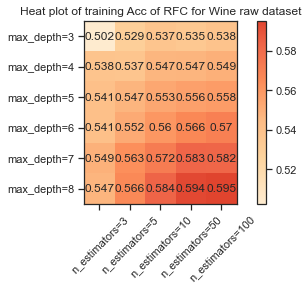

In [132]:
wine_raw_rfc= rfc_gsc(wine_X_train, wine_y_train)
print("best parameters : ",wine_raw_rfc.best_params_)
plot.grid_search(wine_raw_rfc.cv_results_, change=('n_estimators','max_depth'))
#print(wine_raw_rfc)
plt.title("Heat plot of training Acc of RFC for Wine raw dataset")
plt.show()

#### RFC for Raw Abalone

best parameters :  {'max_depth': 5, 'n_estimators': 50}


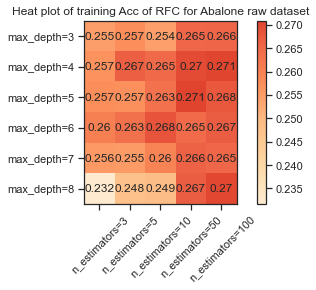

In [136]:
abalone_raw_rfc = rfc_gsc(abalone_X_train, abalone_y_train)
print("best parameters : ", abalone_raw_rfc.best_params_)
plot.grid_search(abalone_raw_rfc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc of RFC for Abalone raw dataset")
plt.show()

#### RFC for wine PCA

best parameters :  {'max_depth': 8, 'n_estimators': 50}


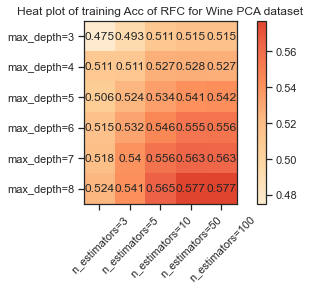

In [161]:
wine_pca_rfc = rfc_gsc(wine_X_train_pca_6c, wine_y_train)
print("best parameters : ", wine_pca_rfc.best_params_)
plot.grid_search(wine_pca_rfc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc of RFC for Wine PCA dataset")
plt.show()

#### RFC for Wine LDA

best parameters :  {'max_depth': 8, 'n_estimators': 100}


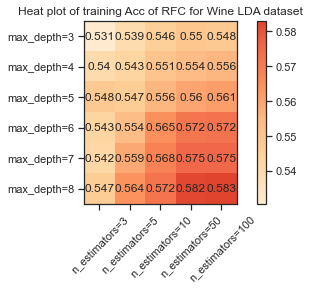

In [162]:
wine_lda_rfc = rfc_gsc(wine_X_train_lda_4c, wine_y_train)
print("best parameters : ", wine_lda_rfc.best_params_)
plot.grid_search(wine_lda_rfc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc of RFC for Wine LDA dataset")
plt.show()

#### RFC for abalone PCA

best parameters :  {'max_depth': 4, 'n_estimators': 100}


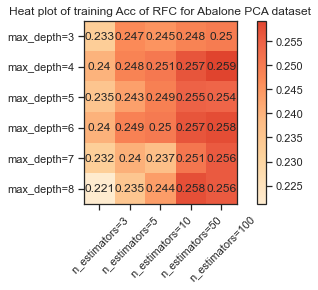

In [163]:
abalone_pca_rfc = rfc_gsc(ab_X_train_pca_6c, abalone_y_train)
print("best parameters : ", abalone_pca_rfc.best_params_)
plot.grid_search(abalone_pca_rfc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc of RFC for Abalone PCA dataset")
plt.show()

#### RFC for abalone LDA

best parameters :  {'max_depth': 5, 'n_estimators': 50}


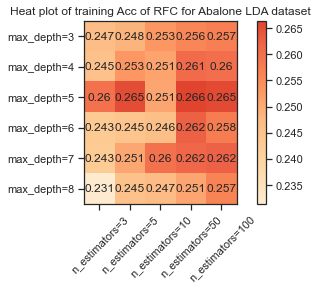

In [164]:
abalone_lda_rfc = rfc_gsc(ab_X_train_lda_5c, abalone_y_train)
print("best parameters : ", abalone_lda_rfc.best_params_)
plot.grid_search(abalone_lda_rfc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc of RFC for Abalone LDA dataset")
plt.show()

# Answer 5) Gradient Tree Boosting


## Answer 5.1 & 5.2

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [165]:

def gbc_gsc(X,y):
    gbc = GradientBoostingClassifier(random_state = 42)
    parameters = {
        
        
        "max_depth":[3,4,5,6,7,8],
        
        "n_estimators":[3,5,10,20,50]
        }

    gbc_clf = GridSearchCV(estimator=gbc, param_grid=parameters, cv= 5)
    #result = cross_val_score(CV_rfc,X,y,scoring ="accuracy",cv = kfold , n_jobs = -1)
    gbc_clf.fit(X,y)
    #print("score :",gbc_clf.score(X,y))
    return gbc_clf

#### GTB for Wine Raw

Best parameters : {'max_depth': 8, 'n_estimators': 50}


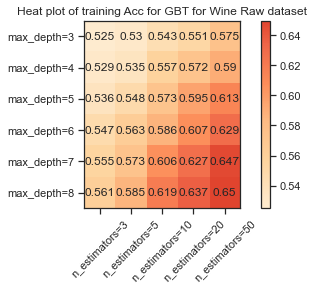

In [166]:
wine_raw_gbc= gbc_gsc(wine_X_train, wine_y_train)
print("Best parameters :",wine_raw_gbc.best_params_)
plot.grid_search(wine_raw_gbc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc for GBT for Wine Raw dataset")
plt.show()
#print(wine_raw_rfc)

#### GTB for Raw abalone

Best Parameters :  {'max_depth': 3, 'n_estimators': 10}


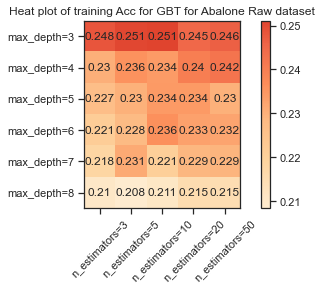

In [190]:
abalone_raw_gbc = gbc_gsc(abalone_X_train, abalone_y_train)
print("Best Parameters : ", abalone_raw_gbc.best_params_)
plot.grid_search(abalone_raw_gbc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc for GBT for Abalone Raw dataset")
plt.show()

#### GTB for Wine PCA

Best Parameters {'max_depth': 8, 'n_estimators': 50}


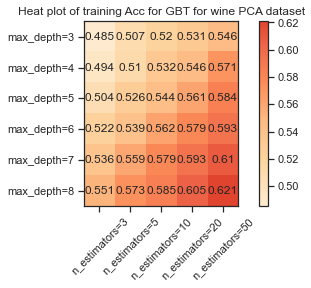

In [191]:
wine_pca_gbc = gbc_gsc(wine_X_train_pca_6c, wine_y_train)
print("Best Parameters",wine_pca_gbc.best_params_)
plot.grid_search(wine_pca_gbc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc for GBT for wine PCA dataset")
plt.show()

#### GTB for Wine Lda

Best Parameters :  {'max_depth': 8, 'n_estimators': 50}


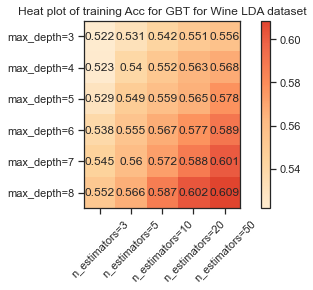

In [192]:
wine_lda_gbc = gbc_gsc(wine_X_train_lda_4c, wine_y_train)
print("Best Parameters : ",wine_lda_gbc.best_params_)
plot.grid_search(wine_lda_gbc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc for GBT for Wine LDA dataset")
plt.show()

#### GTB for abalone PCA

Best parameters :  {'max_depth': 3, 'n_estimators': 10}


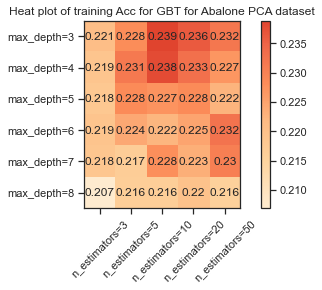

In [199]:
abalone_pca_gbc = gbc_gsc(ab_X_train_pca_6c, abalone_y_train)
print("Best parameters : ", abalone_pca_gbc.best_params_)
plot.grid_search(abalone_pca_gbc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc for GBT for Abalone PCA dataset")
plt.show()

#### GTB for abalone LDA

Best parameters :  {'max_depth': 4, 'n_estimators': 5}


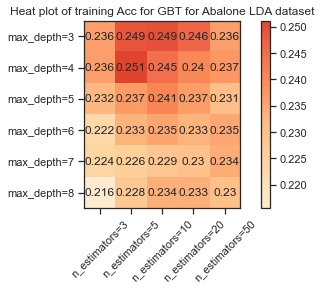

In [200]:
abalone_lda_gbc = gbc_gsc(ab_X_train_lda_5c, abalone_y_train)
print("Best parameters : ", abalone_lda_gbc.best_params_)
plot.grid_search(abalone_lda_gbc.cv_results_, change=('n_estimators','max_depth'))
plt.title("Heat plot of training Acc for GBT for Abalone LDA dataset")
plt.show()

# 6) Final Results

In [209]:
#for Wine
print("                    Table 6: Output Result For Wine Data    ")
dict = {'Classifiers' : ['kNN', 'Naive Bayes(Multinomial)','Naive Bayes(Complement)','Decision Tree', 'Random Forest','Gradient Boosted Tree'],
        'setting'  : [1,2,3,4,5,6],
        'Wine-raw' : [69.38, 43.60,43.39, 55.61, 59.5,65.0],
        'Wine-pca' : [69.61, 43.60,41.33, 39.07, 57.7,62.1],
        'Wine-lda' : [67.53, 43.60,42.90, 54.53, 58.3,60.9]}
df = pd.DataFrame(dict)

display(df)
# print("Setting for above table ")
# print("Setting 1 - For KNN :\n wine_raw : k-value 26 \n wine-pca k-value 41 and 6 component \n wine-lda k-value 67 and 4 components")
# print("Setting 2 - For Naive Bayes(Multinomial):\n for all three(wine raw,pca and lda : We have used defalut parametrs given on sklearn\n Alpha = 1.0((Laplace/Lidstone) smoothing parameter)")
# print("Setting 3 - For Naive Bayes(Complement):\n for all three (wine raw, pca, lda) : we have used dafault parametes given on sklearn \n Alpha =1.0 and Norm = False")
# print("Setting 4 - For Decision Tree :\n wine_raw : {'max_depth': 8, 'n_estimators': 100}\n wine_pca : {'criterion': 'gini', 'max_depth': 14}\n wine_lda : {'criterion': 'gini', 'max_depth': 6}")
# print("Setting 5 - For Random Forest :\n wine_raw : {'max_depth': 8, 'n_estimators': 100}\n wine_pca : {'max_depth': 8, 'n_estimators': 50}\n wine_lda : {'max_depth': 8, 'n_estimators': 100}")
# print("Setting 6 - For Gradient Boosted Tree:\n wine_raw : {'max_depth': 8, 'n_estimators': 50}\n wine_pca : {'max_depth': 8, 'n_estimators': 50}\n wine_lda : {'max_depth': 8, 'n_estimators': 50}")
      
# displaying the DataFrame




                    Table 6: Output Result For Wine Data    


,Classifiers,setting,Wine-raw,Wine-pca,Wine-lda
0,kNN,1,69.38,69.61,67.53
1,Naive Bayes(Multinomial),2,43.60,43.60,43.60
2,Naive Bayes(Complement),3,43.39,41.33,42.90
3,Decision Tree,4,55.61,39.07,54.53
4,Random Forest,5,59.50,57.70,58.30
5,Gradient Boosted Tree,6,65.00,62.10,60.90


### Setting for above table 
#### Setting 1 - For KNN :
 * wine_raw : k-value 26 
 * wine-pca k-value 41 and 6 component 
 * wine-lda k-value 67 and 4 components
 
#### Setting 2 - For Naive Bayes(Multinomial):
 * for all three(wine raw,pca and lda : We have used defalut parametrs given on sklearn
 * Alpha = 1.0((Laplace/Lidstone) smoothing parameter)
 
#### Setting 3 - For Naive Bayes(Complement):
 * for all three (wine raw, pca, lda) : we have used dafault parametes given on sklearn 
 * Alpha =1.0 and Norm = False
 
#### Setting 4 - For Decision Tree :

 * wine_raw : {'max_depth': 8, 'n_estimators': 100}
 * wine_pca : {'criterion': 'gini', 'max_depth': 14}
 * wine_lda : {'criterion': 'gini', 'max_depth': 6}
 
#### Setting 5 - For Random Forest :

 * wine_raw : {'max_depth': 8, 'n_estimators': 100}
 * wine_pca : {'max_depth': 8, 'n_estimators': 50}
 * wine_lda : {'max_depth': 8, 'n_estimators': 100}
 
#### Setting 6 - For Gradient Boosted Tree:

 * wine_raw : {'max_depth': 8, 'n_estimators': 50}
 * wine_pca : {'max_depth': 8, 'n_estimators': 50}
 * wine_lda : {'max_depth': 8, 'n_estimators': 50}

In [210]:


print("            Table 7: Output Result For Abalone Data    ")
dict = {'' : ['kNN', 'Naive Bayes(Multinomial)','Naive Bayes(Complement)', 'Decision Tree', 'Random Forest','Gradient Boosted Tree'],
        'setting'     : [1,2,3,4,5,6],
        'abalone-raw' : [29.18, 16.70,17.41, 24.28 , 27.1,25.1],
        'abalone-pca' : [28.70, 16.67,20.41, 26.43 , 25.9,23.9],
        'abalone-lda' : [29.06, 16.67,24.72, 26.31, 26.6,25.1]}
df = pd.DataFrame(dict)
  
display(df)



            Table 7: Output Result For Abalone Data    


,,setting,abalone-raw,abalone-pca,abalone-lda
0,kNN,1,29.18,28.70,29.06
1,Naive Bayes(Multinomial),1,16.70,16.67,16.67
2,Naive Bayes(Complement),1,17.41,20.41,24.72
3,Decision Tree,1,24.28,26.43,26.31
4,Random Forest,1,27.10,25.90,26.60
5,Gradient Boosted Tree,1,25.10,23.90,25.10


### Setting for above table 

#### Setting 1 - For KNN :
 * abalone_raw : k-value 61 
 * abalone-pca k-value 40 and 6 component 
 * abalone-lda k-value 65 and 5 components
 
#### Setting 2 -  For Naive Bayes(Multinomial):
 * for all three(abalone raw,pca and lda : We have used defalut parametrs given on sklearn
 * cAlpha = 1.0((Laplace/Lidstone) smoothing parameter)
 
#### Setting 3 - For Naive Bayes(Complement):
 * for all three (abalone raw, pca, lda) : we have used dafault parametes given on sklearn 
 * Alpha =1.0 and Norm = False
 
#### Setting 4 - For Decision Tree :
 * abalone_raw : {'criterion': 'gini', 'max_depth': 6}
 * abalone_pca : {'criterion': 'gini', 'max_depth': 6}
 * abalone_lda : {'criterion': 'gini', 'max_depth': 4}
 
#### Setting 5 - For Random Forest :
 * abalone_raw : {'max_depth': 5, 'n_estimators': 50}
 * abalone_pca : {'max_depth': 4, 'n_estimators': 100}
 * abalone_lda : {'max_depth': 5, 'n_estimators': 50}
 
#### Setting 6 - For Gradient Boosted Tree:
 * abalone_raw : {'max_depth': 3, 'n_estimators': 10}
 * abalone_pca : {'max_depth': 3, 'n_estimators': 10}
 * abalone_lda : {'max_depth': 4, 'n_estimators': 5}




### Overall, KNN performed well on both datasets.  

*  Dimensionality Reduction did not perform well on any of the dataset as our dataset is small with respect to its  diversity. Additionally, given datasets are highly unbalanced and given feature space is not able to define it well. 
*  So If we will reduce the feature space it will be more tought for classfier to classify the data into multiple classes.
* Further dimentionality reduction works well when we have large amount of data with big feature space (so that it can produce well define features (new or existed)), which is opposite to our scenario.



# References

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

[2]https://en.wikipedia.org/wiki/Scree_plot

[3]Understanding the difference between normalization and standardization and its implementation scenarios
https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

[4]https://www.kaggle.com/sriram1204/abalone-machine-learning-insights

[5]https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

[6]https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingCla.html

[7]https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[8]Naive Bayes classifier
https://scikit-learn.org/stable/modules/naive_bayes.html

[9]Sklearn evaluation/ ploting libraries
https://sklearn-evaluation.readthedocs.io/en/stable/api/plot.html